# 은행 마케팅 데이터셋을 활용한 분류기 만들기
-  `분류(classification)`: 새로운 관측값이 주어졌을 때, 그 관측값이 미리 정의된 여러 범주(하위 집단) 중 어느 하나에 속하는지를 결정하는 문제
- 은행 마케팅 데이터셋을 사용하여, 몇 가지 속성에 따라 누군가가 예금을 할지 여부를 예측하는 모델을 만들어 보겠습니다.
- 각 모델을 구축한 후, 모델을 평가하고 우리 사례에 가장 적합한 모델이 무엇인지 비교해보겠습니다.
- GridSearch를 사용해 모델의 하이퍼파라미터를 튜닝하여 모델을 최적화해 보겠습니다. 데이터셋에서 나온 예측 결과를 저장하고, 나중에 다시 사용할 수 있도록 모델을 저장할 것입니다.

In [1]:
!pip install seaborn scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 13.4 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 21.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 21.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   --- ------------------------------------ 3.7/44.8 MB 16.8 MB/s eta 0:00:03
   ------------------ --------------------- 21.0/44.8 MB 55.2 MB/s eta 0:00:01
   -------------------- ------------------- 23.3/44.8 MB 38.9 MB/s eta 0:00:01
   -------------------------------- ------- 35.9/44.8 MB 43.1 MB/s eta 0:00:01
   ---------------------------------------  44.6/44.8 MB 48.9 MB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 MB 42.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)

: 

# 1. Preprocessing


## 가. Loading data

- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### 독립변수:
1. 개인정보
    - age (숫자형): 나이
    - job: 직업 유형 (범주형: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    - marital: 결혼 상태 (범주형: 'divorced','married','single','unknown'; 참고: 'divorced'는 이혼 또는 사별을 의미함)
    - education: 교육 수준 (범주형: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    - default: 연체된 대출이 있는지 여부 (범주형: 'no','yes','unknown')
    - housing: 주택 대출이 있는지 여부 (범주형: 'no','yes','unknown')
    - loan: 개인 대출이 있는지 여부 (범주형: 'no','yes','unknown')
    --------------------
2. 마케팅 관련 정보
    - contact: 연락 방식 (범주형: 'cellular','telephone')
    - month: 마지막 연락 월 (범주형: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    - day_of_week: 마지막 연락 요일 (범주형: 'mon','tue','wed','thu','fri')
    - duration: 마지막 연락 시간(초 단위, 숫자형).
        - 중요한 주의사항: 이 속성은 출력(target)에 큰 영향을 미침 (예: duration=0이면 y='no'). 그러나 통화가 이루어지기 전에는 duration을 알 수 없고, 통화가 끝나면 y값은 명확해짐. 따라서 이 속성은 벤치마크 목적으로만 포함되어야 하며, 현실적인 예측 모델을 만들 때는 제외해야 함.
    - campaign: 이번 캠페인에서 해당 고객에게 이루어진 연락 횟수 (숫자형, 마지막 연락 포함)
    - pdays: 이전 캠페인에서 고객에게 마지막으로 연락한 후 경과한 일수 (숫자형; 999는 이전에 연락하지 않은 경우를 의미)
    - previous: 이번 캠페인 전에 해당 고객에게 이루어진 연락 횟수 (숫자형)
    - poutcome: 이전 마케팅 캠페인의 결과 (범주형: 'failure','nonexistent','success')

### 종속변수(target, 예측 대상):
- y: 고객이 정기 예금을 신청했는지 여부 (이진형: 'yes','no')

In [5]:
# Load dataset
df_bank = pd.read_csv('C:\ITStudy\classification_bank_marketing_dataset\Classification_Bank_Marketing_Dataset\bank.csv')

In [6]:
df_bank.info()
df_bank.describe().T
df_bank.describe(include='all').T
# 'duration' 컬럼 버리기(drop)
# print(df_bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,11162.0,NaN,NaN,NaN,41.231948,11.913369,18.0,32.0,39.0,49.0,95.0
job,11162,12,management,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,11162,3,married,6351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11162,4,secondary,5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,11162,2,no,10994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,11162.0,NaN,NaN,NaN,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.0,81204.0
housing,11162,2,no,5881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,11162,2,no,9702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,11162,3,cellular,8042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,11162.0,NaN,NaN,NaN,15.658036,8.42074,1.0,8.0,15.0,22.0,31.0


## EDA

### 가. TARGET 클래스의 분포 확인

In [7]:
df_bank['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


### 나. 결측값 확인
- `isnull()` 또는 `sum()` 으로 결측값을 확인합니다.

In [8]:
df_bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


- 또는 missingno 라는 패키지를 이용할 수도 있습니다.

### 수치형 데이터 스케일링

- StandardScaler는 이상치에 덜 민감합니다. 이는 데이터에 이상치가 포함되어 있을 때 유리합니다. 또한 데이터의 분포를 유지하면서 스케일링을 수행하므로, 데이터의 상대적인 크기와 분포를 유지할 수 있습니다.

<div align="center">$Z = \frac{X - U}{S}$</div>

*Where:*

*$Z:$ scaled value*

*$X:$ original value*

*$U:$ mean of the data*

*$S:$ standard deviation of the data*


- 참고
    - StandardScaler 외에도 다양한 스케일링 방법이 있습니다. 각 방법은 데이터의 특성과 모델의 요구사항에 따라 선택할 수 있습니다.

    - 1) MinMaxScaler:
        ```
        데이터의 최소값을 0, 최대값을 1로 변환합니다.
        이상치에 민감할 수 있습니다.
        주로 신경망 모델에서 사용됩니다.

        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(df_bank_ready[num_cols])
        ```

    - 2) RobustScaler:
        ```
        중앙값(median)과 IQR(Interquartile Range)을 사용하여 스케일링합니다.
        이상치에 덜 민감합니다.

        from sklearn.preprocessing import RobustScaler
        scaler = RobustScaler()
        scaled_data = scaler.fit_transform(df_bank_ready[num_cols])
        ```

    - 3) MaxAbsScaler:
        ```
        각 특징의 절대 최대값을 1로 스케일링합니다.
        양수와 음수의 데이터가 혼합된 경우 유용합니다.

        from sklearn.preprocessing import MaxAbsScaler
        scaler = MaxAbsScaler()
        scaled_data = scaler.fit_transform(df_bank_ready[num_cols])
        ```

    - 4) Normalizer:
        ```
        각 샘플의 벡터 크기를 1로 스케일링합니다.
        주로 텍스트 데이터나 신경망의 입력 데이터에 사용됩니다.

        from sklearn.preprocessing import Normalizer
        scaler = Normalizer()
        scaled_data = scaler.fit_transform(df_bank_ready[num_cols])
        ```


In [22]:
from sklearn.preprocessing import StandardScaler
pd.options.display.float_format = '{:.2e}'.format

# bank_df를 복제해 놓고 복제한 테이블에 작업을 시작

df_bank_ready = df_bank.copy()
df_bank_ready = df_bank_ready.drop('duration', axis=1)  # duration은 사후에 기록된 컬럼이기 때문에, 앞으로의 예측에서는 수집할 수 없는 데이터

# 스케일러 객체 만든다
sc = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# 스케일러 객체에 fit 한다
df_bank_ready[num_cols] = sc.fit_transform(df_bank_ready[num_cols])

# 스케일러 객체에 transform 한다

In [23]:
df_bank_ready.describe()

,age,balance,day,campaign,pdays,previous
count,1.12e+04,1.12e+04,1.12e+04,1.12e+04,1.12e+04,1.12e+04
mean,2.75e-16,1.02e-17,-2.04e-17,3.06e-17,5.09e-18,-2.04e-17
std,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-1.95e+00,-2.60e+00,-1.74e+00,-5.54e-01,-4.81e-01,-3.63e-01
25%,-7.75e-01,-4.36e-01,-9.09e-01,-5.54e-01,-4.81e-01,-3.63e-01
50%,-1.87e-01,-3.03e-01,-7.81e-02,-1.87e-01,-4.81e-01,-3.63e-01
75%,6.52e-01,5.56e-02,7.53e-01,1.81e-01,-2.81e-01,7.31e-02
max,4.51e+00,2.47e+01,1.82e+00,2.22e+01,7.38e+00,2.49e+01


In [25]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_bank_ready[num_cols])

'''
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaled_data = scaler.fit_transform(df_bank_ready[num_cols])

In [26]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5
count,1.12e+04,1.12e+04,1.12e+04,1.12e+04,1.12e+04,1.12e+04
mean,-3.85e-02,-6.21e-02,-7.20e-03,-5.76e-02,-1.06e-01,-8.93e-02
std,4.88e-01,3.11e-01,5.18e-01,3.47e-01,3.97e-01,3.01e-01
min,-9.29e-01,-9.05e-01,-9.40e-01,-7.17e-01,-7.56e-01,-5.71e-01
25%,-4.44e-01,-2.56e-01,-4.65e-01,-2.89e-01,-3.45e-01,-2.60e-01
50%,-1.18e-01,-1.47e-01,-2.17e-02,-1.35e-01,-2.56e-01,-1.93e-01
75%,3.69e-01,2.83e-02,4.27e-01,9.92e-02,-4.74e-02,1.80e-02
max,9.85e-01,9.99e-01,9.45e-01,9.98e-01,9.96e-01,9.94e-01


## 범주형 변수(Categorical Value) 인코딩

숫자 데이터와 마찬가지로, 컴퓨터가 이해하기 쉽도록 카테고리 데이터를 숫자로 전처리할 필요가 있습니다. 이를 위해 sklearn에서 제공하는 OneHotEncoder()를 사용합니다. 이 방법은 카테고리 열을 다음과 같이 변환합니다.

| marital | housing |
|----------|---------|
| single   | yes     |
| divorced | no      |
| married  | no      |

...위 컬럼이 yes -> 1, no -> 0 를 거쳐 아래와 같이 변환됩니다...

| marital_single | marital_divorced | marital_married | housing_yes | housing_no |
|----------------|------------------|-----------------|-------------|------------|
| 1              | 0                | 0               | 1           | 0          |
| 0              | 1                | 0               | 0           | 1          |
| 0              | 0                | 1               | 0           | 1          |



In [27]:
# single = 0 , divorced = 1, married = 2    명목형 변수  -하나의 항목에 전부를 계산하게 되면 숫자 자체가 의미를 지닌다 라고 착각할 수 있게 됩니다.
# ..... w13x13 + w14x14 + w15x15 +
# single = 0

# 5 4 3 2 1  명목형 변수 - 서수형변수 숫자가 의미를 경우 Label Encoder로
# ... . w13x13  ....

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# OneHot 인코딩으로 범주형 변수를 숫자로 변환
encoder = OneHotEncoder()
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] # 문자열로 된 컬럼들을 0, 1, 2

df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_ready[cat_cols]).toarray())
df_encoded.columns = encoder.get_feature_names_out(cat_cols)
df_encoded


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00
1,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00
2,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,...,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00
3,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00
4,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00
11158,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,...,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00
11159,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00
11160,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,...,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00


In [28]:
# df_bank_ready에 합쳐줍니다.
df_bank_ready = df_bank_ready.drop(cat_cols, axis=1)
df_bank_ready = pd.concat([df_encoded, df_bank_ready], axis=1)
df_bank_ready.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,1.49e+00,2.53e-01,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,yes
1,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,1.24e+00,-4.60e-01,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,yes
2,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,...,0.00e+00,0.00e+00,1.00e+00,-1.95e-02,-8.02e-02,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,yes
3,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,1.16e+00,2.94e-01,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,yes
4,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,1.07e+00,-4.17e-01,-1.27e+00,-1.87e-01,-4.81e-01,-3.63e-01,yes


In [29]:
# deposit  yes =1 , no = 0으로 수치형 변환이 필요합니다.
df_bank_ready['deposit'] = df_bank_ready['deposit'].apply(lambda x: 1 if x =='yes' else 0)
df_bank_ready.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,1.49e+00,2.53e-01,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,1
1,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,1.24e+00,-4.60e-01,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,1
2,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,...,0.00e+00,0.00e+00,1.00e+00,-1.95e-02,-8.02e-02,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,1
3,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,1.16e+00,2.94e-01,-1.27e+00,-5.54e-01,-4.81e-01,-3.63e-01,1
4,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,1.00e+00,1.07e+00,-4.17e-01,-1.27e+00,-1.87e-01,-4.81e-01,-3.63e-01,1


In [30]:
encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

In [31]:
dir(encoder)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_X',
 '_check_feature_names',
 '_check_get_feature_name_combiner',
 '_check_infrequent_enabled',
 '_check_n_features',
 '_compute_n_features_outs',
 '_compute_transformed_categories',
 '_drop_idx_after_grouping',
 '_fit',
 '_fit_infrequent_category_mapping',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_identify_infrequent',
 '_infrequent_enabled',
 '_map_drop_idx_to_infrequent',
 '_map_infrequent_categories',
 '_more_tags',
 '_n_features_outs',
 '_parameter_constr

In [32]:
df_bank_ready[cat_cols]

KeyError: "None of [Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',\n       'month', 'poutcome'],\n      dtype='object')] are in the [columns]"

### 다. 데이터셋 분리

 - 훈련과 테스트 데이터를 각각 80:20 비율로 나눕니다.

In [33]:
# 특성 선택
feature = df_bank_ready.drop('deposit', axis=1)

# 타겟 선택
target = df_bank_ready['deposit']

feature.shape, target.shape
# 훈련 데이터와 테스트 데이터 설정
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, shuffle=True, random_state=121)

# 훈련 데이터와 테스트 데이터 출력
print('훈련 특성:', X_train.shape)
print('테스트 특성:', X_test.shape)
print('훈련 라벨:', y_train.shape)
print('테스트 라벨:', y_test.shape)

훈련 특성: (8929, 50)
테스트 특성: (2233, 50)
훈련 라벨: (8929,)
테스트 라벨: (2233,)


# 3. 모델링

이 단계에서는 각 알고리즘에 대해 기본 파라미터를 사용하여 기준 모델을 만들고, 4개의 모델을 모두 구축한 후 어떤 모델이 가장 잘 작동하는지 비교할 것입니다.

모델을 평가하기 위해, 기본 평가 지표로 혼동 행렬을 사용하겠습니다.

<div align='center'><img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png' height='250'></div>
- TP = True Positive (진짜 양성)
- FP = False Positive (거짓 양성)
- TN = True Negative (진짜 음성)
- FN = False Negative (거짓 음성)

- 분류 모델을 평가하기 위해 다음의 5가지 지표를 사용합니다.

1) 정확도 (Accuracy): 전체 사례 중에서 진짜 결과의 비율입니다.
<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>


2) 정밀도 (Precision): 예측한 양성 중 실제로 양성인 비율을 계산하는 데 사용됩니다.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>

3) 재현율 (Recall): 실제 양성 중에서 올바르게 분류된 비율을 계산하는 데 사용됩니다.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>

4) F1 점수 (F1 Score): 0과 1 사이의 값으로, 정밀도와 재현율의 조화 평균입니다.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>

5) 곡선 아래 면적 (AUC): 양성 클래스의 확률이 음성 클래스와 얼마나 잘 구분되는지를 나타냅니다.


**우리가 분석하려는 도메인의 경우, 모델의 재현율 (Recall) 값을 주목해야 합니다.**
- 실제 양성을 가능한 한 많이 예측해야 하기 때문입니다. 실제로 예금하려는 고객을 잘못 분류하면 기회나 수익을 잃게 됩니다.

In [35]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## 가. 의사결정 나무

의사결정 나무는 행동 방침을 결정하기 위해 사용되는 알고리즘입니다. 나무의 각 브랜치는 가능한 결정, 발생 또는 반응을 나타냅니다.

<div align='center'><img src='https://raw.githubusercontent.com/rafiag/DTI2020/main/images/decision_tree.PNG' height='250'></div>

장점:
* 구축 비용이 저렴함
* 처음보는 데이터를 분류하는 속도가 매우 빠름
* 해석하기 쉬움
* 많은 간단한 데이터 세트에 대해 다른 분류 기법과 비교할 만한 정확도를 가짐

단점:
* 알고리즘이 데이터의 노이즈를 포착할 때 과적합 발생
* 무작위성에 기대므로 데이터의 작은 변동으로 인해 모델이 불안정해질 수 있음

### Modeling

In [ ]:
from sklearn import tree

# Decision Tree model 만들기

dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dtc.score(X_test, y_test)

0.6399462606359158

### Model Evaluation

In [ ]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.6399462606359158
Precision: 0.6167279411764706
Recall: 0.6342155009451795
F1 Score: 0.625349487418453
Area Under Curve: 0.6396609419619514
Confusion Matrix:
 [[758 417]
 [387 671]]


## 나. Random Forest

- 여러 개의 의사결정 나무를 구성하여 작동하는 방법입니다. 다수의 나무의 결정을 최종 결정으로 선택합니다.

<div align='center'><img src='https://miro.medium.com/v2/resize:fit:1010/1*R3oJiyaQwyLUyLZL-scDpw.png' height='250'></div>


장점:
* 회귀 및 분류 작업 모두에 사용할 수 있으며, 입력 특징에 할당된 상대적 중요도를 쉽게 확인할 수 있습니다.
* 기본 하이퍼파라미터로도 좋은 예측 결과를 내기 때문에 매우 편리하고 사용하기 쉬운 알고리즘으로 간주됩니다.

단점:
* 많은 나무가 알고리즘을 느리고 실시간 예측에 비효율적으로 만들 수 있습니다. 더 정확한 예측은 더 많은 나무를 필요로 하며, 이는 더 느린 모델을 초래합니다.
* 예측 모델링 도구이며 설명 도구는 아닙니다.

### Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model
# Evaluate Model

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_eval = evaluate_model(rf, X_test, y_test)

### Model Evaluation

In [ ]:
# Evaluate Model

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.7281683833407971
Precision: 0.7391304347826086
Recall: 0.6587901701323251
F1 Score: 0.6966516741629185
Area Under Curve: 0.7832614728713349
Confusion Matrix:
 [[929 246]
 [361 697]]


## 다. K-Nearest Neighbors

K-최근접 이웃(KNN)은 훈련 데이터에서 k개의 가장 가까운 이웃을 찾아 새로운 데이터를 분류하고, 이웃의 다수결에 따라 클래스를 결정합니다. 예를 들어, 아래 이미지에서 $k = 3$일 때 이웃의 다수는 B로 분류되지만, $k = 7$일 때 다수는 A로 변경됩니다.

<div align='center'><img src='https://raw.githubusercontent.com/rafiag/DTI2020/main/images/knn.PNG' height='200'></div>

장점:
* 구현이 쉬운 간단한 기법
* 모델 구축 비용이 저렴함
* 매우 유연한 분류 방식

단점:
* 미지의 레코드를 분류하는 데 상대적으로 비용이 많이 듦
* k-최근접 이웃의 거리 계산이 필요함
* 훈련 세트의 크기가 커질수록 계산 비용이 많이 듦
* 노이즈나 관련 없는 특징의 존재로 인해 정확도가 심각하게 저하될 수 있음

### Modeling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
# Evaluate Model

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_eval = evaluate_model(knn, X_test, y_test)


In [ ]:
# Evaluate Model

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.6820420958351993
Precision: 0.6891304347826087
Recall: 0.5992438563327032
F1 Score: 0.641051567239636
Area Under Curve: 0.727311667940313
Confusion Matrix:
 [[889 286]
 [424 634]]


## 라. 로지스틱 회귀

로지스틱 회귀는 이진 분류 문제를 해결하기 위해 사용되는 통계 모델입니다. 이 모델은 독립 변수들의 선형 결합을 사용하여 특정 사건이 발생할 확률을 예측합니다. 로지스틱 회귀는 선형 회귀와 유사하지만, 출력 값이 0과 1 사이의 확률로 제한된다는 점에서 차이가 있습니다. 로지스틱 함수(시그모이드 함수)를 사용하여 예측 값을 확률로 변환합니다.

<div align='center'><img src='https://upload.wikimedia.org/wikipedia/commons/6/6d/Exam_pass_logistic_curve.jpeg' height='200'></div>

장점:
* 이진 분류 문제에 효과적임
* 모델의 해석이 쉬움
* 과적합을 방지하기 위해 정규화 기법을 사용할 수 있음
* 계산 비용이 상대적으로 낮음

단점:
* 선형적으로 구분 가능한 데이터에만 효과적임
* 다중 공선성 문제에 민감함
* 복잡한 관계를 학습하기 어려움
* 이상치에 민감할 수 있음

In [ ]:
from sklearn.linear_model import LogisticRegression

# Building KNN model
# Evaluate Model

lrc = LogisticRegression()
lrc.fit(X_train, y_train)

lrc_eval = evaluate_model(lrc, X_test, y_test)


### Model Evaluation

In [ ]:
# Evaluate Model

# Print result
print('Accuracy:', lrc_eval['acc'])
print('Precision:', lrc_eval['prec'])
print('Recall:', lrc_eval['rec'])
print('F1 Score:', lrc_eval['f1'])
print('Area Under Curve:', lrc_eval['auc'])
print('Confusion Matrix:\n', lrc_eval['cm'])

Accuracy: 0.7021943573667712
Precision: 0.731995277449823
Recall: 0.5860113421550095
F1 Score: 0.6509186351706038
Area Under Curve: 0.7524988939387844
Confusion Matrix:
 [[948 227]
 [438 620]]


## 모델비교

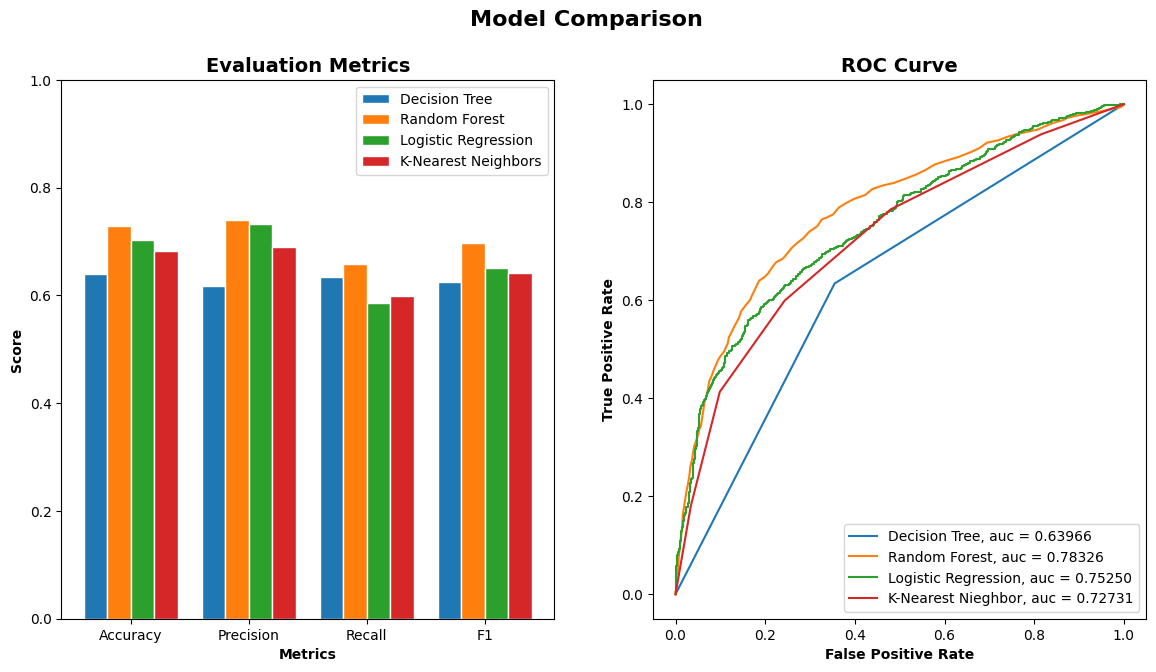

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
lrc_score = [lrc_eval['acc'], lrc_eval['prec'], lrc_eval['rec'], lrc_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, lrc_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(lrc_eval['fpr'], lrc_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lrc_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

랜덤 포레스트 모델이 평가한 5개의 지표 중 정밀도를 제외한 4개의 지표에서 다른 모델들을 능가합니다. 따라서 랜덤 포레스트가 우리의 문제를 해결하는 데 적합한 선택이라고 결론을 내릴 수 있습니다.

# Model Optimization

하이퍼파라미터를 조정하여 RandomForest 모델을 최적화하려고 합니다. 최적의 파라미터를 찾은 후, 이전의 기본 모델과 비교하여 새로운 모델을 평가할 것입니다.

## 하이퍼파라미터 튜닝

- GridSearchCV 함수는 각 파라미터 조합을 반복하여 가장 좋은 점수를 내는 파라미터를 찾아냅니다.

이 함수는 교차 검증도 사용할 수 있게 해줍니다. 교차 검증에서는 데이터가 5등분(파라미터로 조정 가능)되며, 각 반복에서 5분의 4는 훈련 데이터로 사용되고 나머지 1개는 검증 데이터로 사용됩니다. 이 과정은 모든 데이터 분할이 검증 데이터로 사용될 때까지 5번 반복됩니다.

<div align='center'><img src='https://i.imgur.com/9k60cVA.png' height='200'></div>
어떤 파라미터 조합이 가장 효과적인지 보려면, 그리드 서치 객체에서 best_params_ 속성을 확인할 수 있습니다.

참고: 제공하는 조합이 많을수록 처리 시간이 길어집니다. 대신, RandomizedSearchCV를 사용하여 무작위로 지정된 개수의 파라미터 조합을 선택해 처리 시간을 단축할 수도 있습니다.

![](https://www.researchgate.net/publication/341691661/figure/fig2/AS:896464364507139@1590745168758/Comparison-between-a-grid-search-and-b-random-search-for-hyper-parameter-tuning-The.png)
- 출처: https://www.researchgate.net/publication/341691661/figure/fig2/AS:896464364507139@1590745168758/Comparison-between-a-grid-search-and-b-random-search-for-hyper-parameter-tuning-The.png

```
'acc': 0.7281683833407971,
 'prec': 0.7391304347826086,
 'rec': 0.6587901701323251,
 'f1': 0.6966516741629185,
 ```

In [ ]:
rf_eval

{'acc': 0.7281683833407971,
 'prec': 0.7391304347826086,
 'rec': 0.6587901701323251,
 'f1': 0.6966516741629185,
 'fpr': array([0.        , 0.        , 0.00170213, 0.00170213, 0.00255319,
        0.00595745, 0.00680851, 0.0093617 , 0.01191489, 0.01446809,
        0.01531915, 0.01617021, 0.01787234, 0.02042553, 0.02382979,
        0.02723404, 0.0306383 , 0.03319149, 0.03659574, 0.03914894,
        0.04170213, 0.04680851, 0.05021277, 0.05361702, 0.05702128,
        0.05957447, 0.06212766, 0.06468085, 0.06893617, 0.07234043,
        0.07489362, 0.08085106, 0.08595745, 0.09106383, 0.09446809,
        0.09957447, 0.10808511, 0.11659574, 0.11914894, 0.12510638,
        0.13106383, 0.1412766 , 0.14638298, 0.15659574, 0.16595745,
        0.17191489, 0.17957447, 0.18638298, 0.19744681, 0.20680851,
        0.2093617 , 0.21787234, 0.22468085, 0.24      , 0.26042553,
        0.2706383 , 0.28425532, 0.2987234 , 0.31659574, 0.32595745,
        0.3387234 , 0.35148936, 0.36425532, 0.3812766 , 0.3991489

In [ ]:
3 * 3 * 3 * 3 * 3 * 5  # n_iter=10

243

In [ ]:
10 * 5

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}


# 1. 모델을 만듭니다
rfc2 = RandomForestClassifier(random_state=121)

# 2. 모델한테 일을 시킬 CV 객체를 만듭니다.
# 3. CV 객체한테 모델과 파라미터를 넘겨줍니다.
grid_search = RandomizedSearchCV(rfc2, param_grid, cv=5, scoring='recall', n_jobs=-1, refit=True) # n_jobs = -1 병렬적으로 전체 코어를 사용해서 모델을 돌리게 된다.

grid_search.fit(X_train, y_train)

# 4. 최종 결과를 확인합니다.

'''

{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

# {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 4, 'max_depth': 80}

Accuracy: 0.7218987908643081
Precision: 0.7632508833922261
Recall: 0.6067415730337079
F1 Score: 0.676056338028169
Area Under Curve: 0.7882432367266239
Confusion Matrix:
 [[964 201]
 [420 648]]


{'acc': 0.7304075235109718,
 'prec': 0.7645011600928074,
 'rec': 0.6228733459357277,
 'f1': 0.6864583333333334,

'''

"\n\n{'max_depth': 50,\n 'max_features': 4,\n 'min_samples_leaf': 3,\n 'min_samples_split': 12,\n 'n_estimators': 100}\n\n \nAccuracy: 0.7218987908643081\nPrecision: 0.7632508833922261\nRecall: 0.6067415730337079\nF1 Score: 0.676056338028169\nCohens Kappa Score: 0.4379480033414438\nArea Under Curve: 0.7882432367266239\nConfusion Matrix:\n [[964 201]\n [420 648]]\n"

In [ ]:
best_grid_eval = evaluate_model(grid_search, X_test, y_test)

In [ ]:
best_grid_eval

{'acc': 0.7304075235109718,
 'prec': 0.7645011600928074,
 'rec': 0.6228733459357277,
 'f1': 0.6864583333333334,
 'fpr': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.51063830e-04,
        8.51063830e-04, 1.70212766e-03, 1.70212766e-03, 2.55319149e-03,
        2.55319149e-03, 3.40425532e-03, 3.40425532e-03, 4.25531915e-03,
        4.25531915e-03, 5.10638298e-03, 5.10638298e-03, 5.95744681e-03,
        5.95744681e-03, 6.80851064e-03, 6.80851064e-03, 7.65957447e-03,
        7.65957447e-03, 8.51063830e-03, 8.51063830e-03, 9.36170213e-03,
        9.36170213e-03, 1.02127660e-02, 1.02127660e-02, 1.10638298e-02,
        1.10638298e-02, 1.19148936e-02, 1.19148936e-02, 1.27659574e-02,
        1.27659574e-02, 1.44680851e-02, 1.44680851e-02, 1.53191489e-02,
        1.53191489e-02, 1.70212766e-02, 1.70212766e-02, 1.78723404e-02,
        1.78723404e-02, 1.87234043e-02, 1.87234043e-02, 1.95744681e-02,
        1.95744681e-02, 2.04255319e-02, 2.04255319e-02, 2.12765957e-02,
        2.1276595

In [ ]:
print(grid_search.best_params_)
print(pd.DataFrame(grid_search.cv_results_))

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 4, 'max_depth': 80}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.03e+00      8.01e-01         2.58e-01        8.95e-03   
1       4.65e+00      1.06e+00         2.57e-01        1.05e-02   
2       9.71e-01      1.42e-02         7.21e-02        9.45e-03   
3       3.37e+00      9.48e-01         2.02e-01        3.67e-02   
4       1.40e+00      3.29e-01         1.00e-01        2.71e-02   
5       5.31e+00      7.20e-01         3.46e-01        1.03e-01   
6       8.51e-01      1.42e-02         6.24e-02        1.68e-03   
7       8.56e-01      8.50e-03         6.21e-02        1.28e-03   
8       4.79e+00      1.07e+00         3.66e-01        1.19e-01   
9       2.48e+00      3.44e-01         2.11e-01        6.11e-02   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                500                      10                      4   
1             

In [ ]:
dir(grid_search)

## 최적화된 모델 평가

모델에 대한 최적의 파라미터를 찾은 후, `GridSearchCV` 객체의 `best_estimator_` 속성을 사용하여 최적화된 모델을 `best_grid`라는 변수에 저장할 수 있습니다. 이후, 함수를 사용하여 5가지 평가 지표를 계산하고 다음 단계에서 기본 모델과 비교해보겠습니다.

In [ ]:


# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.7304075235109718
Precision: 0.7645011600928074
Recall: 0.6228733459357277
F1 Score: 0.6864583333333334
Area Under Curve: 0.7832586574427864
Confusion Matrix:
 [[972 203]
 [399 659]]


## 모델 비교

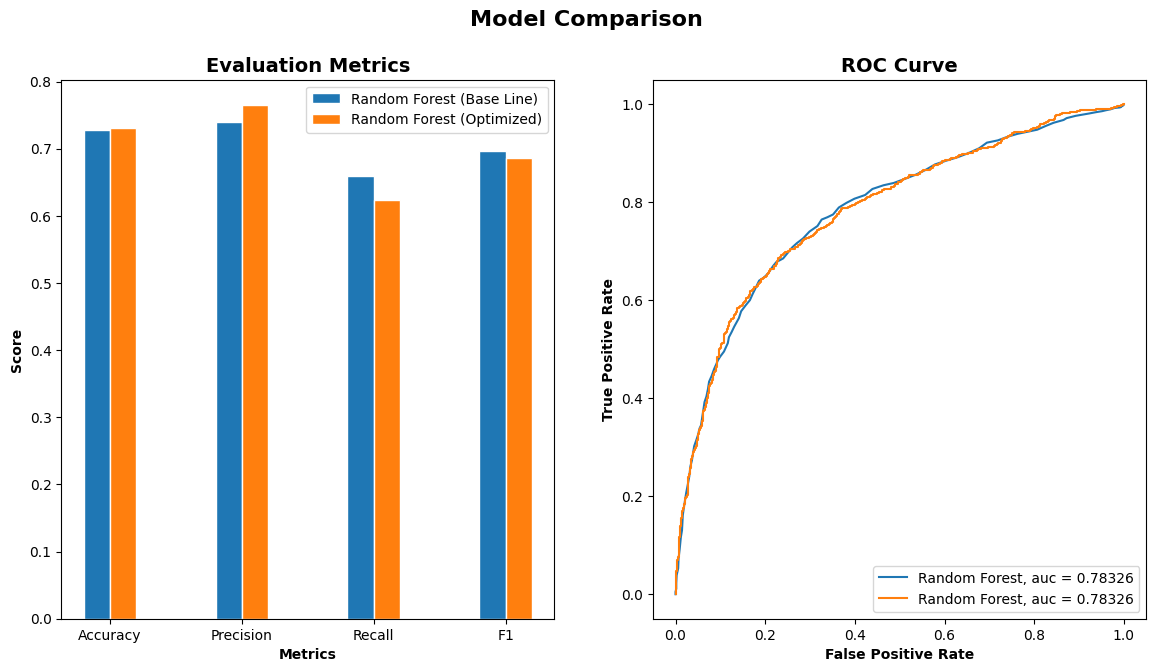

Change of 0.31% on accuracy.
Change of 3.43% on precision.
Change of -5.45% on recall.
Change of -1.46% on F1 score.
Change of -0.00% on AUC.


In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

우리는 가능한 한 실제 양성 값을 많이 예측하는 것이 목표이기 때문에, 아쉽지만 재현율 점수가 더 높은 원래 모델을 예측에 사용하겠습니다.

# Output

`joblib` 모듈을 사용하여 모델을 저장하고 불러오면, 프로덕션에서 사용하거나 나중에 사용할 수 있도록 모델을 저장할 수 있어 훈련 과정을 반복할 필요가 없습니다.

## Prediction

데이터셋의 모든 행에 대한 예상 결과를 예측한 후, 나중에 더 쉽게 접근할 수 있도록 이를 CSV 파일로 저장할 것입니다.

In [ ]:
df_bank['deposit_prediction'] = rf.predict(feature)
df_bank['deposit_prediction'] = df_bank['deposit_prediction'].apply(lambda x : 'yes' if x==1 else 'no')
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_prediction
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,no
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,no
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,no


In [ ]:
df_bank.to_csv('deposit_prediction.csv', index=False)

## 모델 저장

In [ ]:
from joblib import dump, load

# 모델을 바이너리 데이터로 저장을 합니다. 확장자를 모듈명으로 보통 저장합니다.
dump(rf, 'bank_deposit_classification_2409131227.joblib')

['bank_deposit_classification_2409131227.joblib']

In [ ]:
new_clf = load('bank_deposit_classification_2409131227.joblib')

In [ ]:
new_clf.predict(feature)

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
 evaluate_model(new_clf, X_test, y_test)

{'acc': 0.7281683833407971,
 'prec': 0.7391304347826086,
 'rec': 0.6587901701323251,
 'f1': 0.6966516741629185,
 'fpr': array([0.        , 0.        , 0.00170213, 0.00170213, 0.00255319,
        0.00595745, 0.00680851, 0.0093617 , 0.01191489, 0.01446809,
        0.01531915, 0.01617021, 0.01787234, 0.02042553, 0.02382979,
        0.02723404, 0.0306383 , 0.03319149, 0.03659574, 0.03914894,
        0.04170213, 0.04680851, 0.05021277, 0.05361702, 0.05702128,
        0.05957447, 0.06212766, 0.06468085, 0.06893617, 0.07234043,
        0.07489362, 0.08085106, 0.08595745, 0.09106383, 0.09446809,
        0.09957447, 0.10808511, 0.11659574, 0.11914894, 0.12510638,
        0.13106383, 0.1412766 , 0.14638298, 0.15659574, 0.16595745,
        0.17191489, 0.17957447, 0.18638298, 0.19744681, 0.20680851,
        0.2093617 , 0.21787234, 0.22468085, 0.24      , 0.26042553,
        0.2706383 , 0.28425532, 0.2987234 , 0.31659574, 0.32595745,
        0.3387234 , 0.35148936, 0.36425532, 0.3812766 , 0.3991489

# 결론

간단한 모델이지만, 데이터를 분류하는 데에 꽤 괜찮은 성능을 보였습니다. 그러나 모델에는 아직 몇 가지 약점이 있으며, 특히 재현율(Recall) 지표에서 약 60%에 그친다는 점이 눈에 띕니다. 이는 모델이 잠재 고객의 60%만 탐지하고 나머지 40%는 놓친다는 의미입니다. `GridSearchCV`로 모델을 최적화한 후에도 결과가 크게 달라지지 않았는데, 이는 이 모델의 한계에 도달했을 가능성을 시사합니다.

성능을 개선하기 위해 다른 알고리즘들을 시도해 볼 수 있습니다.

# 참고

1. Kaggle Dataset - https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset
2. Telkom Digital Talent Incubator - Data Scientist Module 5 (Classification)
3. [Scikit-learn Documentation](https://scikit-learn.org/stable/index.html)
4. [The 5 Classification Evaluation metrics every Data Scientist must know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)
5. [The Python Graph Gallery - Grouped Bar Plot](https://python-graph-gallery.com/11-grouped-barplot/)